In [1]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [2]:
import pandas as pd
from src.model import tcr_metric, tcr_representation_model
from time import time

/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
levenshtein = tcr_metric.BetaCdrLevenshtein()
tcrdist = tcr_metric.BetaTcrdist()
blastr = tcr_representation_model.load_blastr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/Beta_CDR_BERT_Unsupervised"))

/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
models_dict = {
    "Levenshtein": levenshtein,
    "tcrdist": tcrdist,
    "BLAsTR": blastr
}

In [5]:
data = pd.read_csv("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/data/preprocessed/tanno/test.csv")

In [6]:
time_dict = dict()

for model_name, model in models_dict.items():
    print(f"Checking {model_name}...")

    model_times = []

    for data_size in (10, 100, 1000, 5000, 10_000, 30_000, 50_000):
        print(f"Checking {data_size}...")

        if model_name == "tcrdist" and data_size > 10_000:
            model_times.append(None)
            continue

        if model_name == "Levenshtein" and data_size > 30_000:
            model_times.append(None)
            continue

        data_sample = data[:data_size]

        start = time()
        model.calc_pdist_vector(data_sample)
        end = time()

        elapsed_time = end - start

        model_times.append(elapsed_time)
    
    time_dict[model_name] = model_times

Checking Levenshtein...
Checking 10...
Checking 100...
Checking 1000...
Checking 5000...
Checking 10000...
Checking 30000...
Checking 50000...
Checking tcrdist...
Checking 10...
Checking 100...
Checking 1000...
Checking 5000...
Checking 10000...
Checking 30000...
Checking 50000...
Checking BLAsTR...
Checking 10...
Checking 100...
Checking 1000...


/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Checking 5000...
Checking 10000...
Checking 30000...
Checking 50000...


In [8]:
for model, times in time_dict.items():
    print(model)
    print(times)

Levenshtein
[0.0036458969116210938, 0.003488302230834961, 0.06873011589050293, 1.6174137592315674, 7.68701696395874, 77.0395336151123, None]
tcrdist
[2.524813652038574, 0.012165069580078125, 0.4696066379547119, 12.742800951004028, 51.3829824924469, None, None]
BLAsTR
[0.11972761154174805, 0.02749037742614746, 0.4116690158843994, 2.3525660037994385, 6.046626806259155, 31.944874048233032, 75.7903299331665]


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

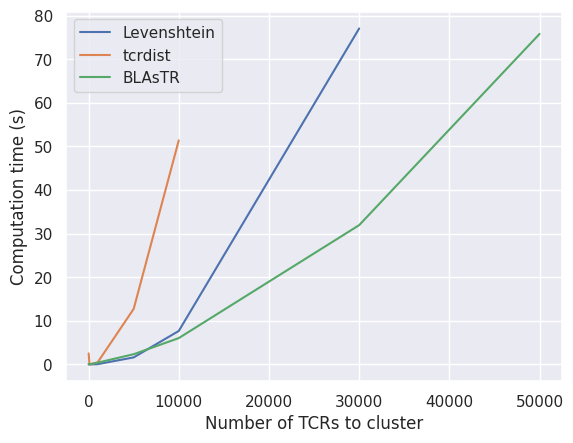

In [17]:
num_tcrs = (10, 100, 1000, 5000, 10000, 30000, 50000)

plt.figure()

for model, times in time_dict.items():
    plt.plot(num_tcrs, times, label=model)

plt.xlabel("Number of TCRs to cluster")
plt.ylabel("Computation time (s)")

plt.legend()
plt.show()